# Top 10 Spenders

#### Load the data and necessary libraries

In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('../../dsi_team_22/data/raw/pharma.csv')

## Exploring Year Range: 2005 to 2014

### Top 10 Highest Spending Countries (Average Per Capita)

This table ranks the top 10 highest spending countries by their average spending per capita in USD.

| Rank | Country Code | Country Name     | Average Spending Per Capita ($ USD) |
|:----:|:------------:|:----------------:|:-----------------------------------:|
| 1    | USA          | United States    | 937.895500                          |
| 2    | CAN          | Canada           | 720.361100                          |
| 3    | CHE          | Switzerland      | 700.745600                          |
| 4    | GRC          | Greece           | 655.150889                          |
| 5    | JPN          | Japan            | 646.764700                          |
| 6    | IRL          | Ireland          | 635.788600                          |
| 7    | DEU          | Germany          | 627.021300                          |
| 8    | FRA          | France           | 617.524100                          |
| 9    | BEL          | Belgium          | 595.256000                          |
| 10   | LUX          | Luxembourg       | 573.441300                          |


#### Supporting Python Code:

In [ ]:
# Filter the DataFrame to include only the years 2005 to 2014
df_filtered = df[(df['TIME'] >= 2005) & (df['TIME'] <= 2014)]

# Exclude the dropped countries
df_filtered = df_filtered[~df_filtered['LOCATION'].isin(['GBR', 'NZL', 'TUR', 'RUS'])]

# Identify the Top 10 highest spending countries (Per Capita)
top_10_per_cap = df_filtered.groupby('LOCATION')['USD_CAP'].mean().sort_values(ascending=False).head(10)

# Display the results
print("Top 10 Highest Spending Countries:")
print(top_10_per_cap)

Top 10 Highest Spending Countries:
LOCATION
USA    937.895500
CAN    720.361100
CHE    700.745600
GRC    655.150889
JPN    646.764700
IRL    635.788600
DEU    627.021300
FRA    617.524100
BEL    595.256000
LUX    573.441300
Name: USD_CAP, dtype: float64


## Data Visualization using Python

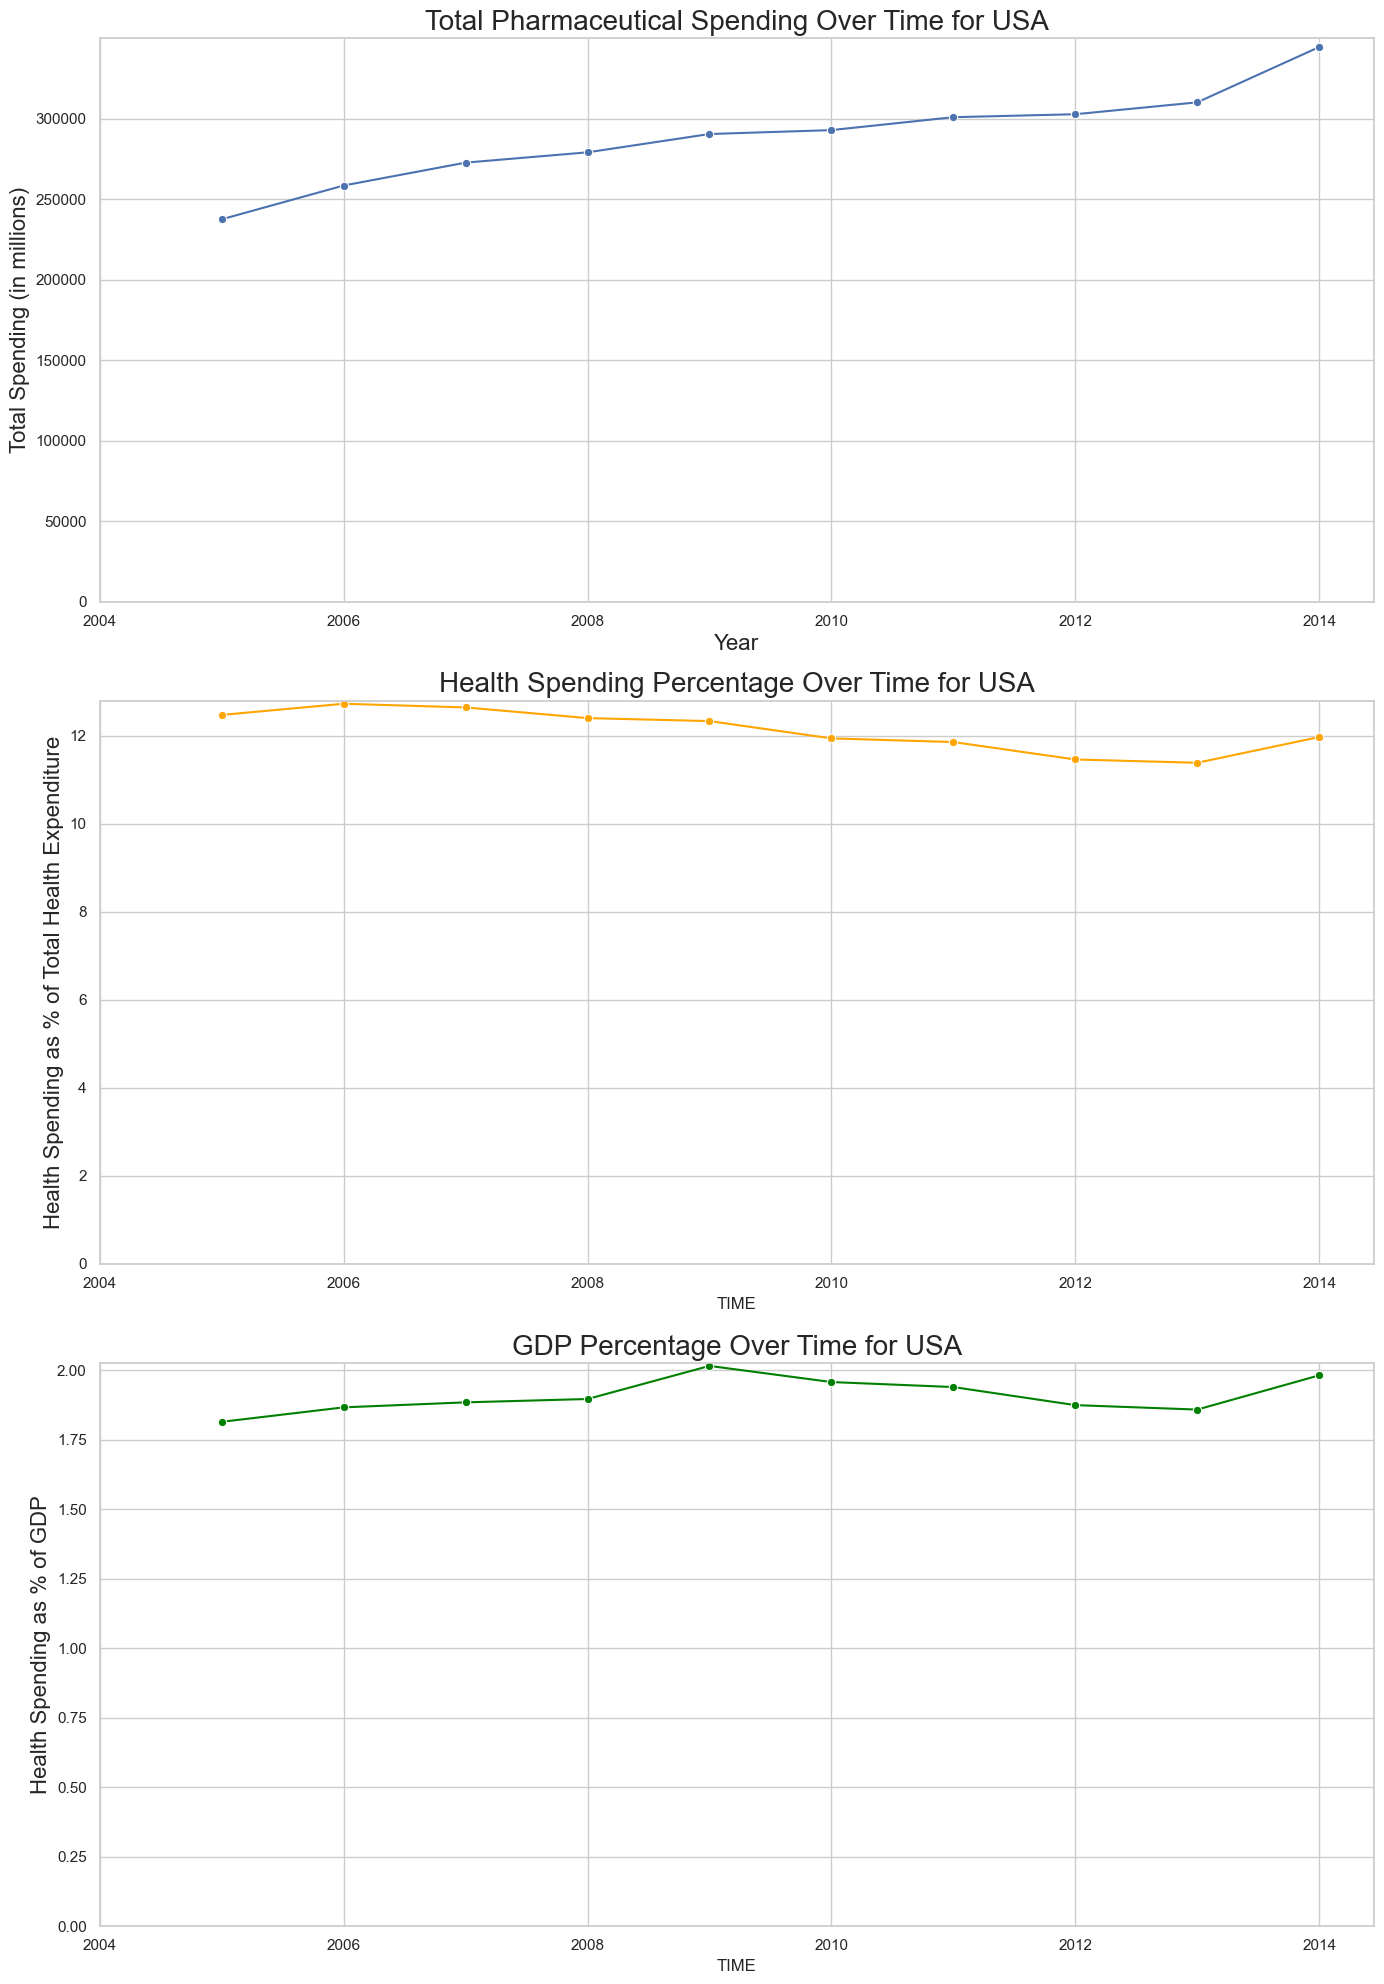

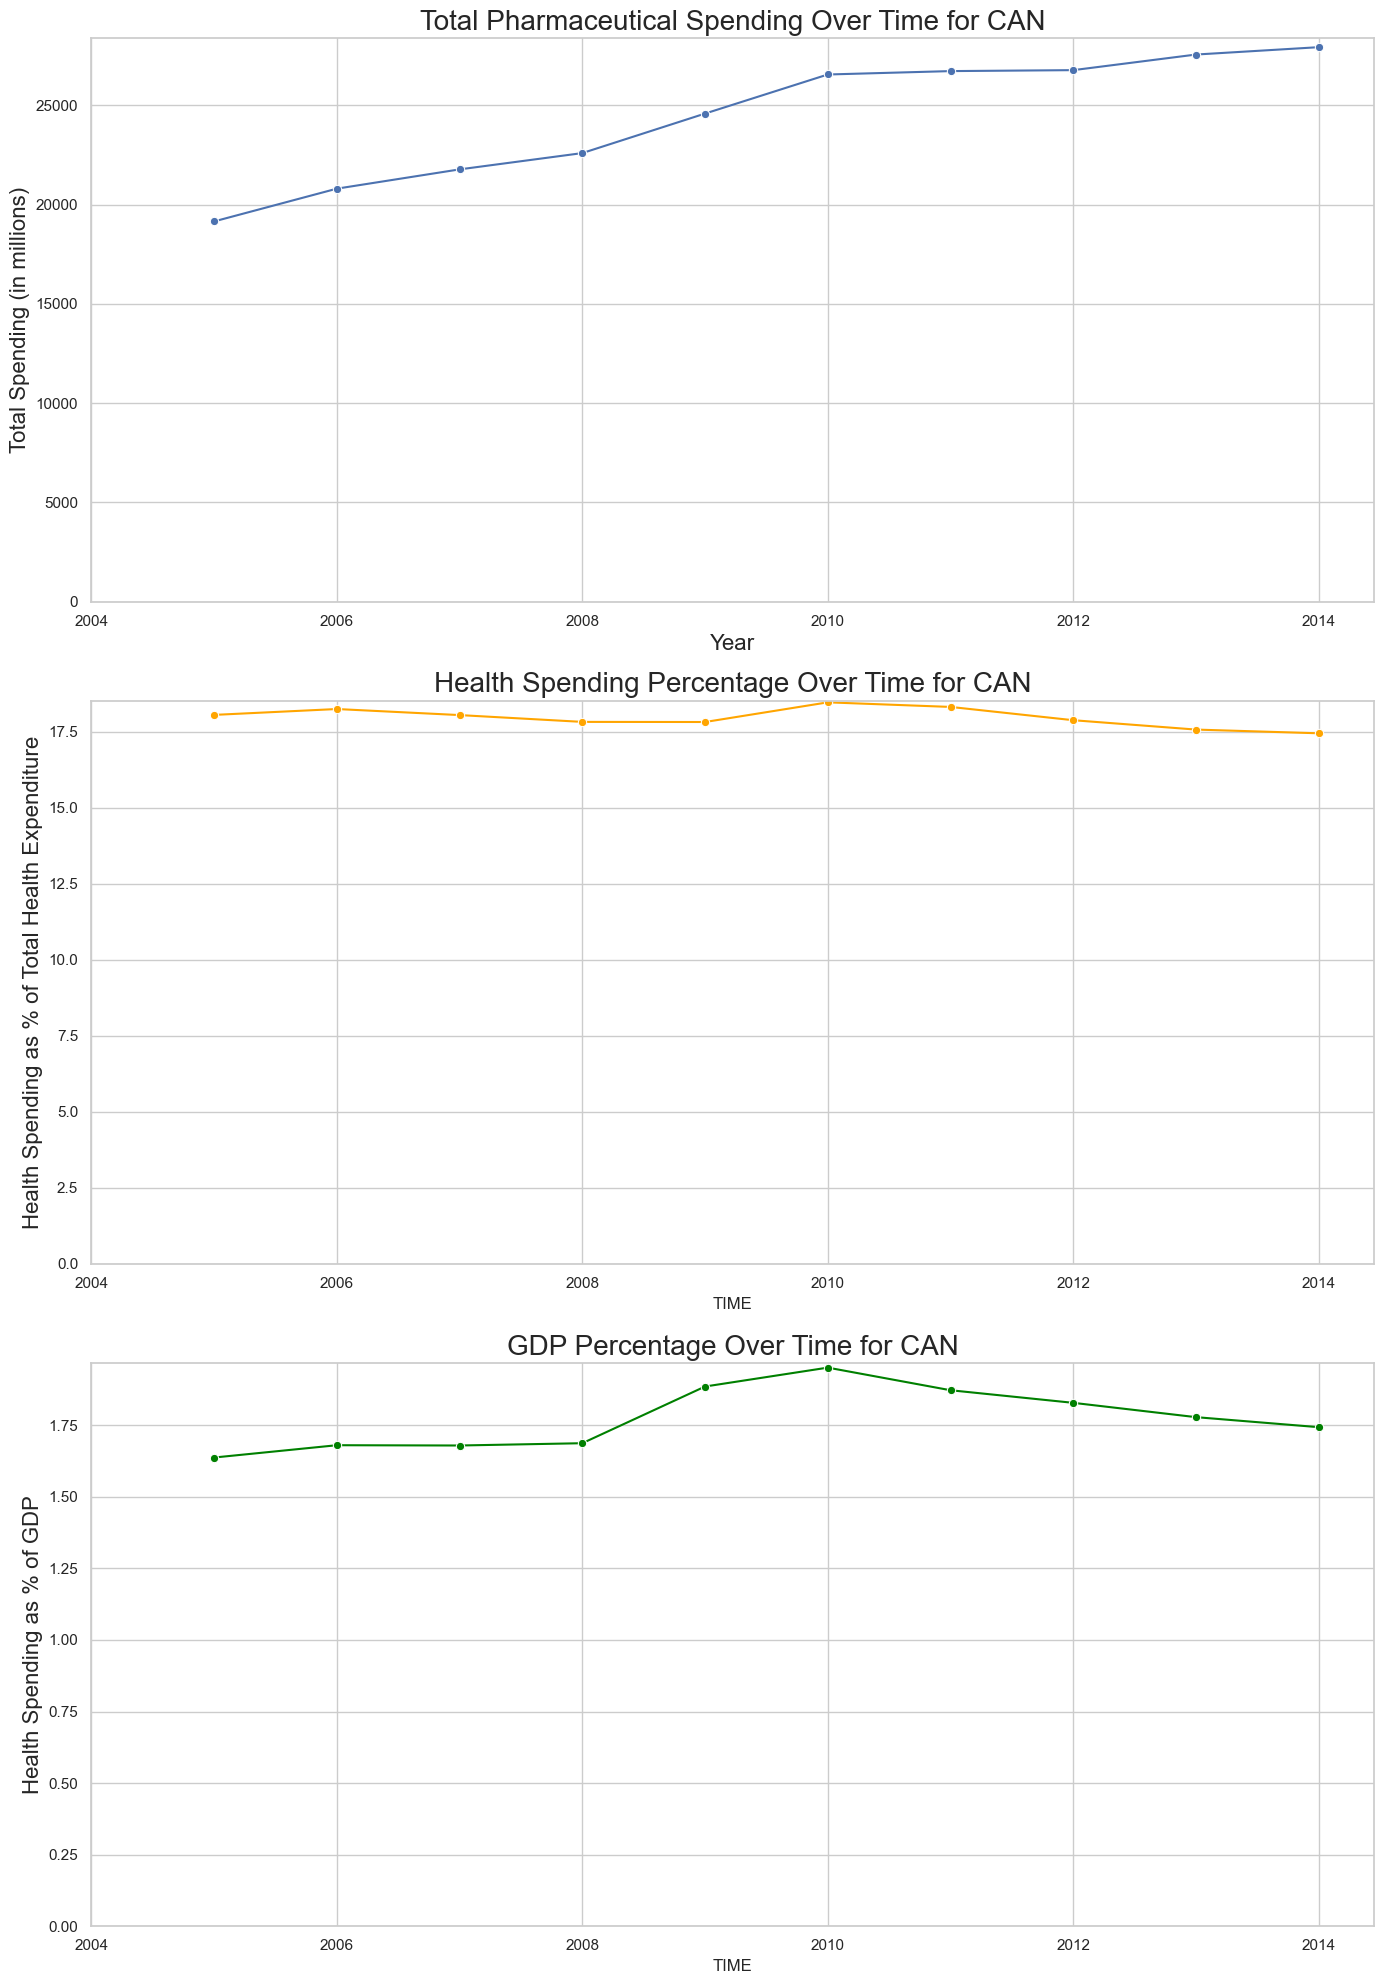

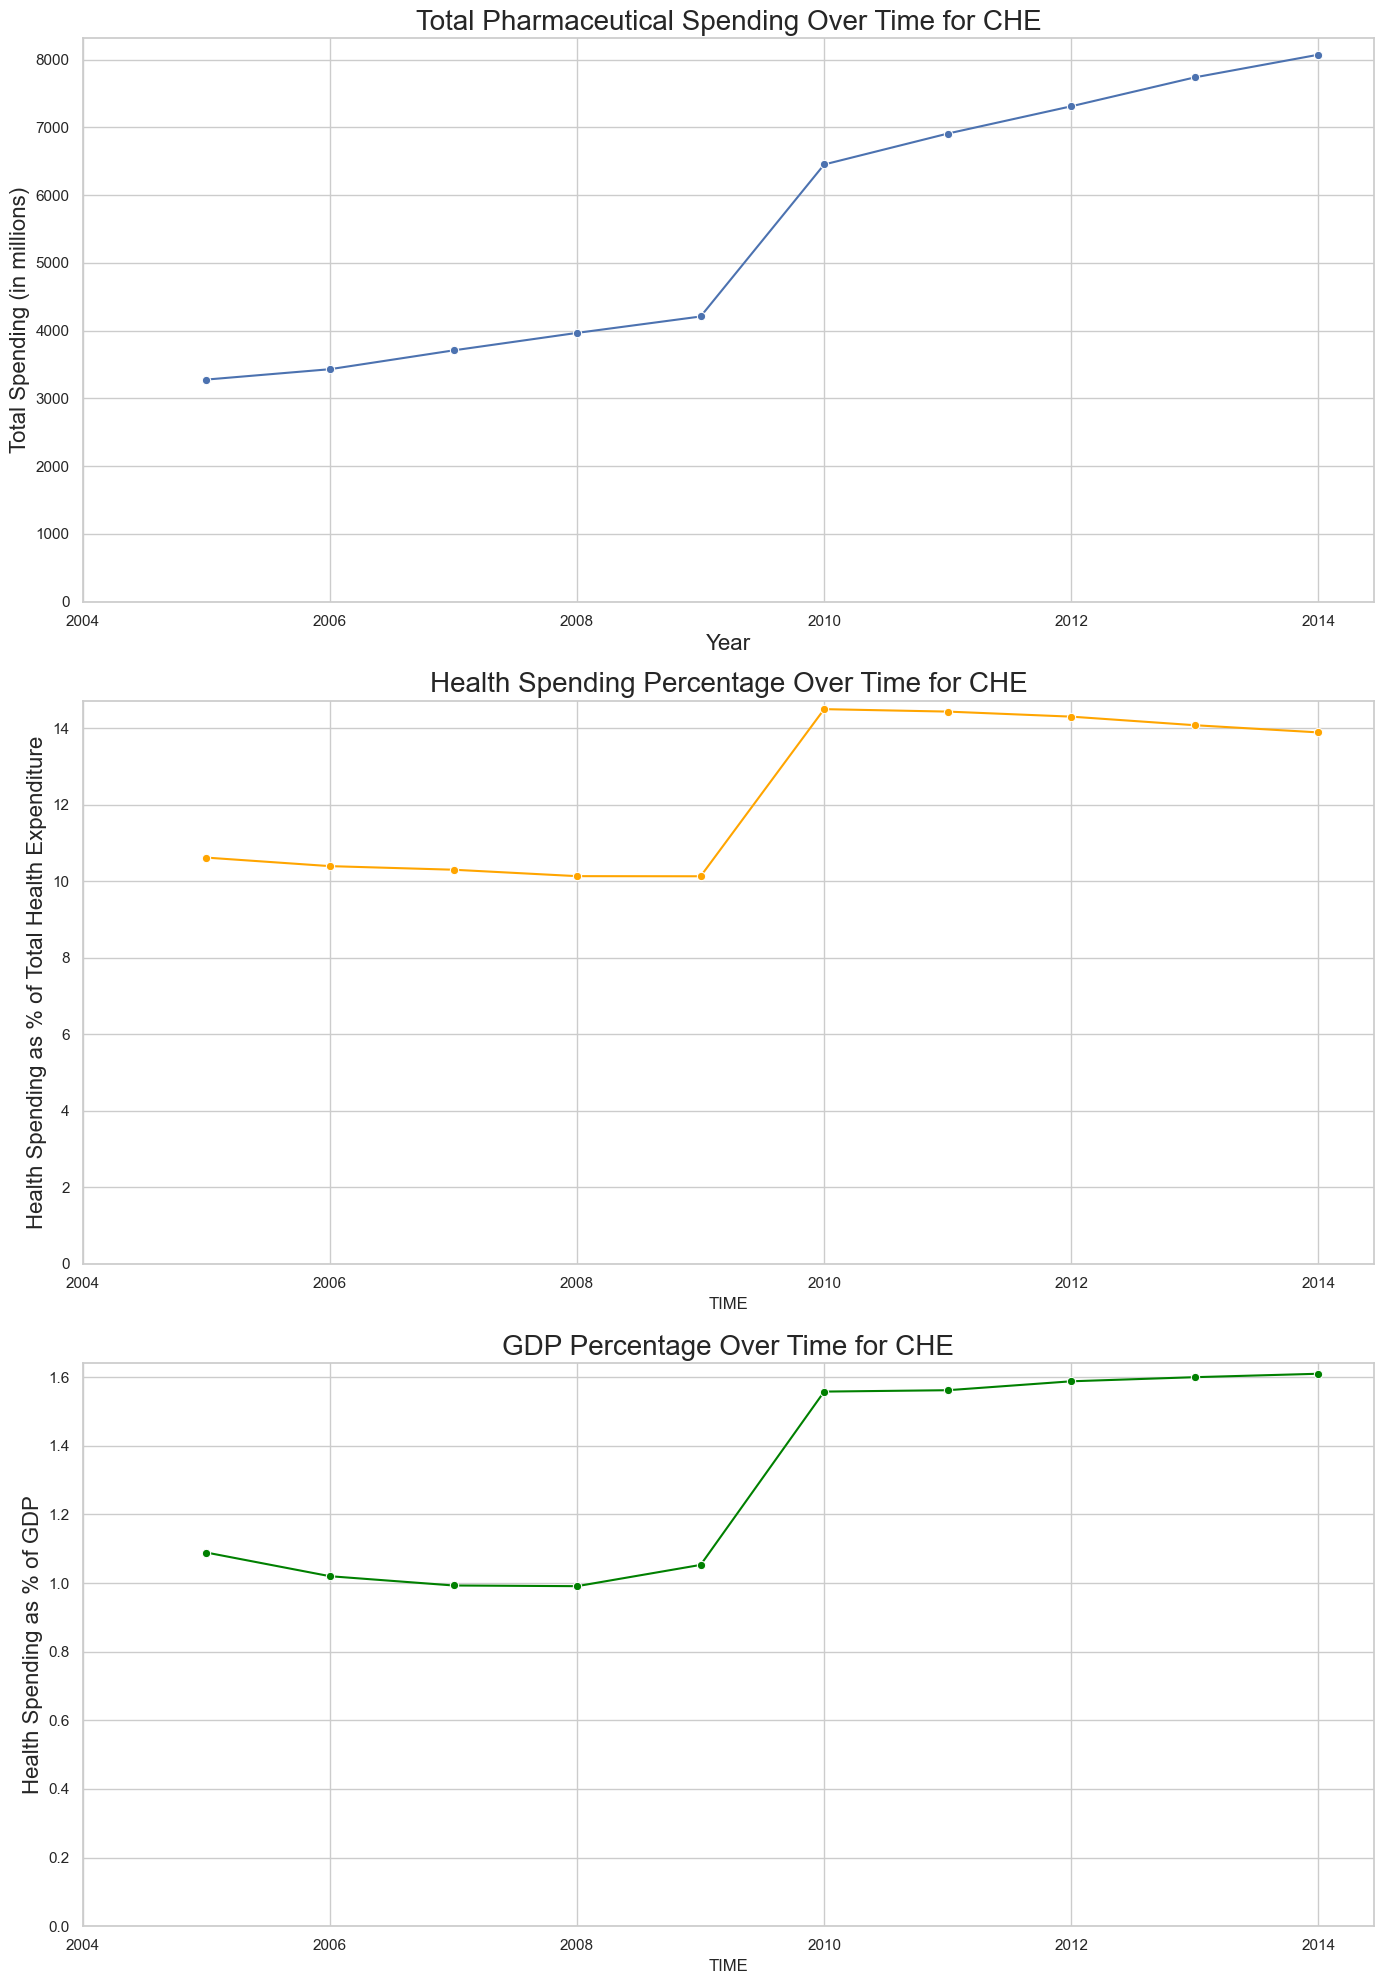

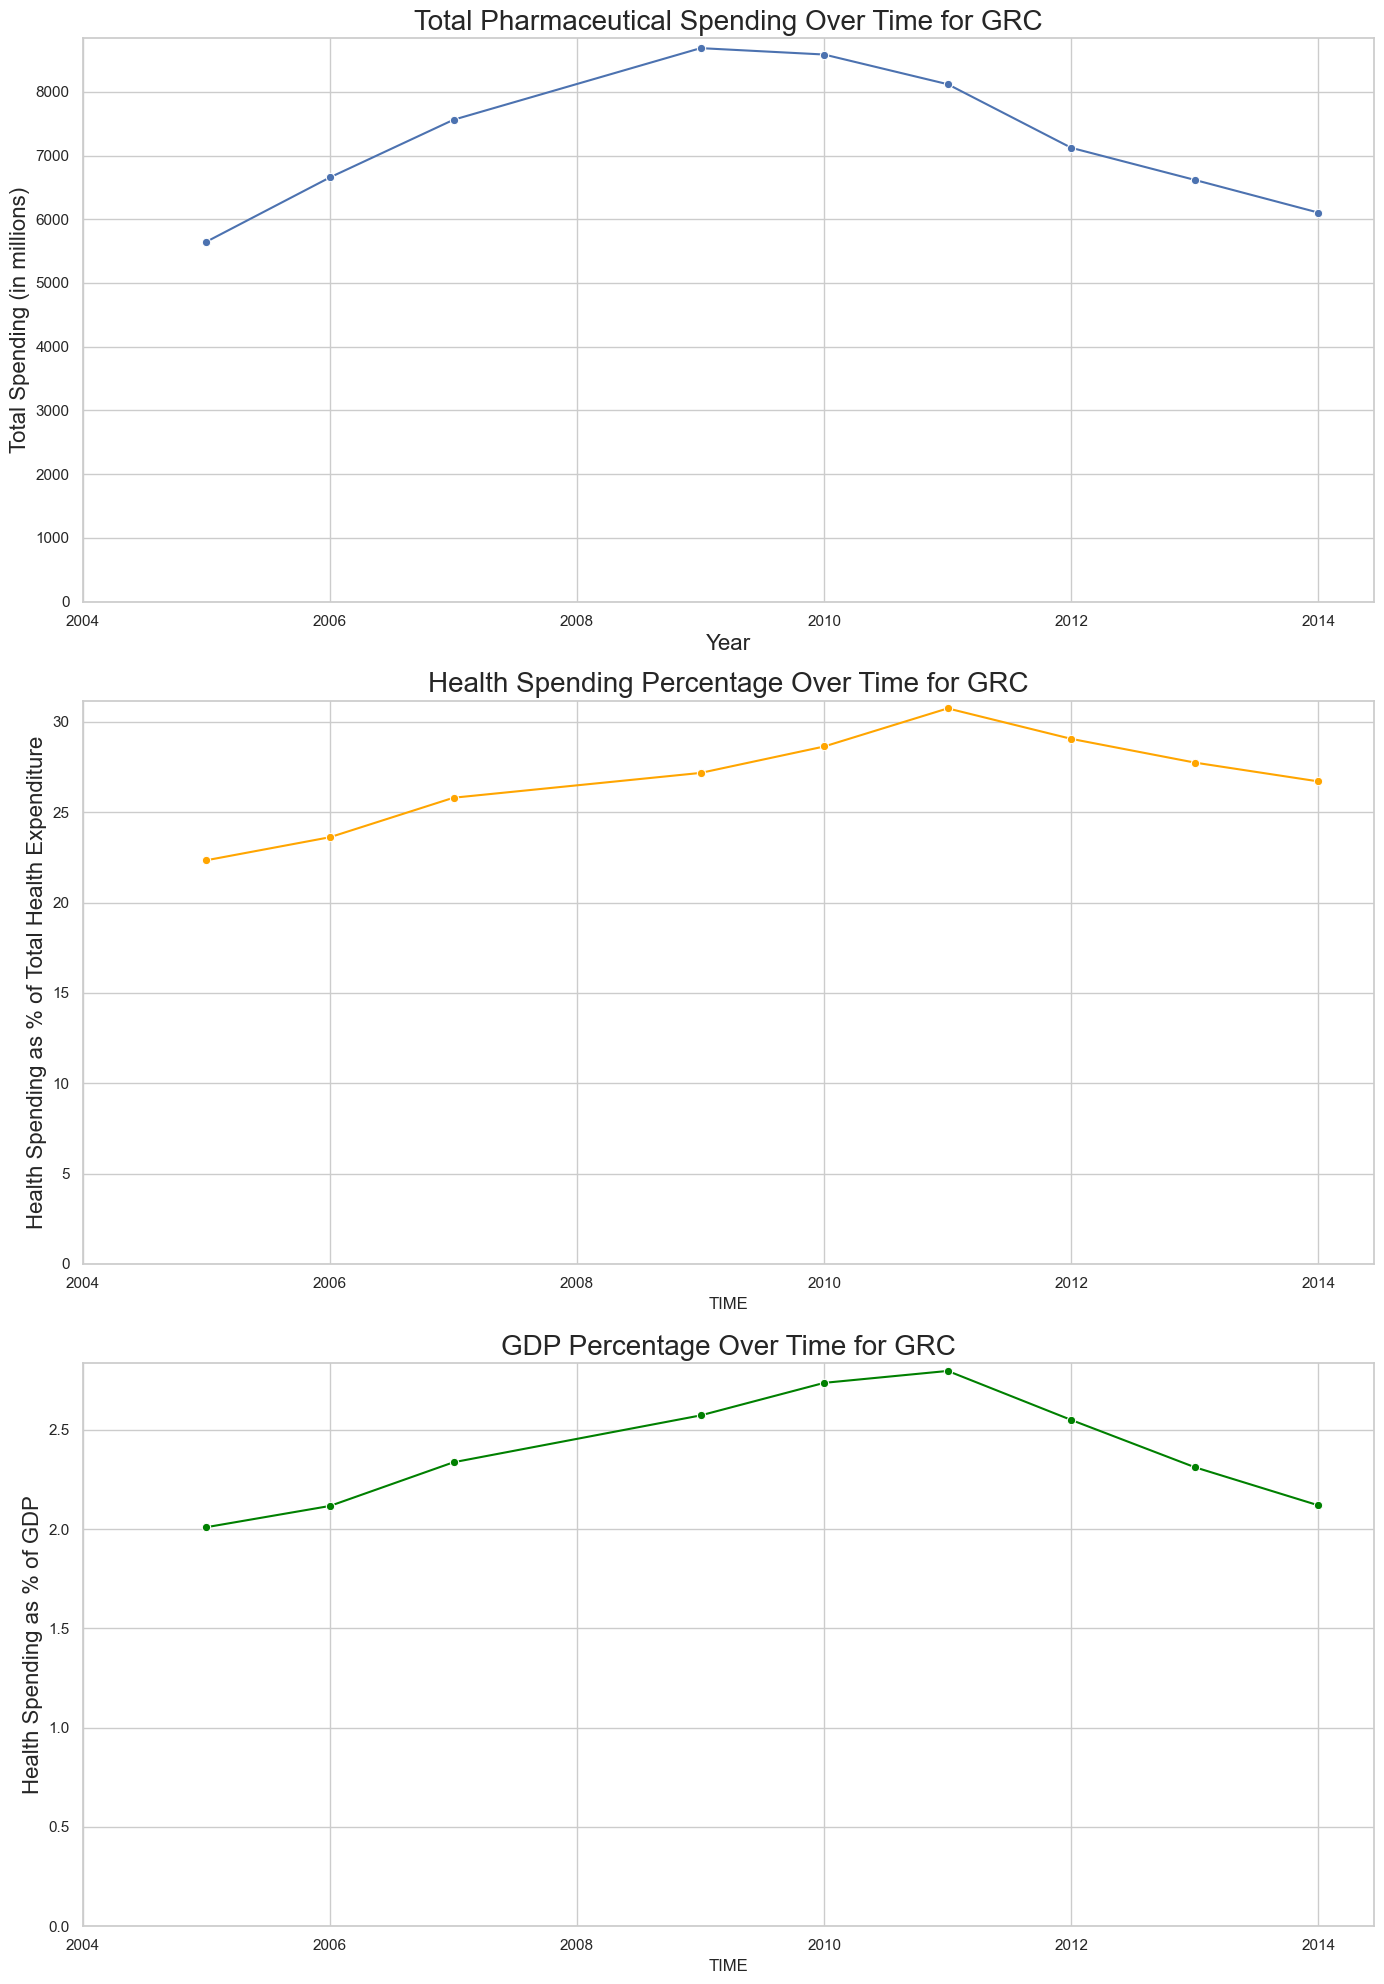

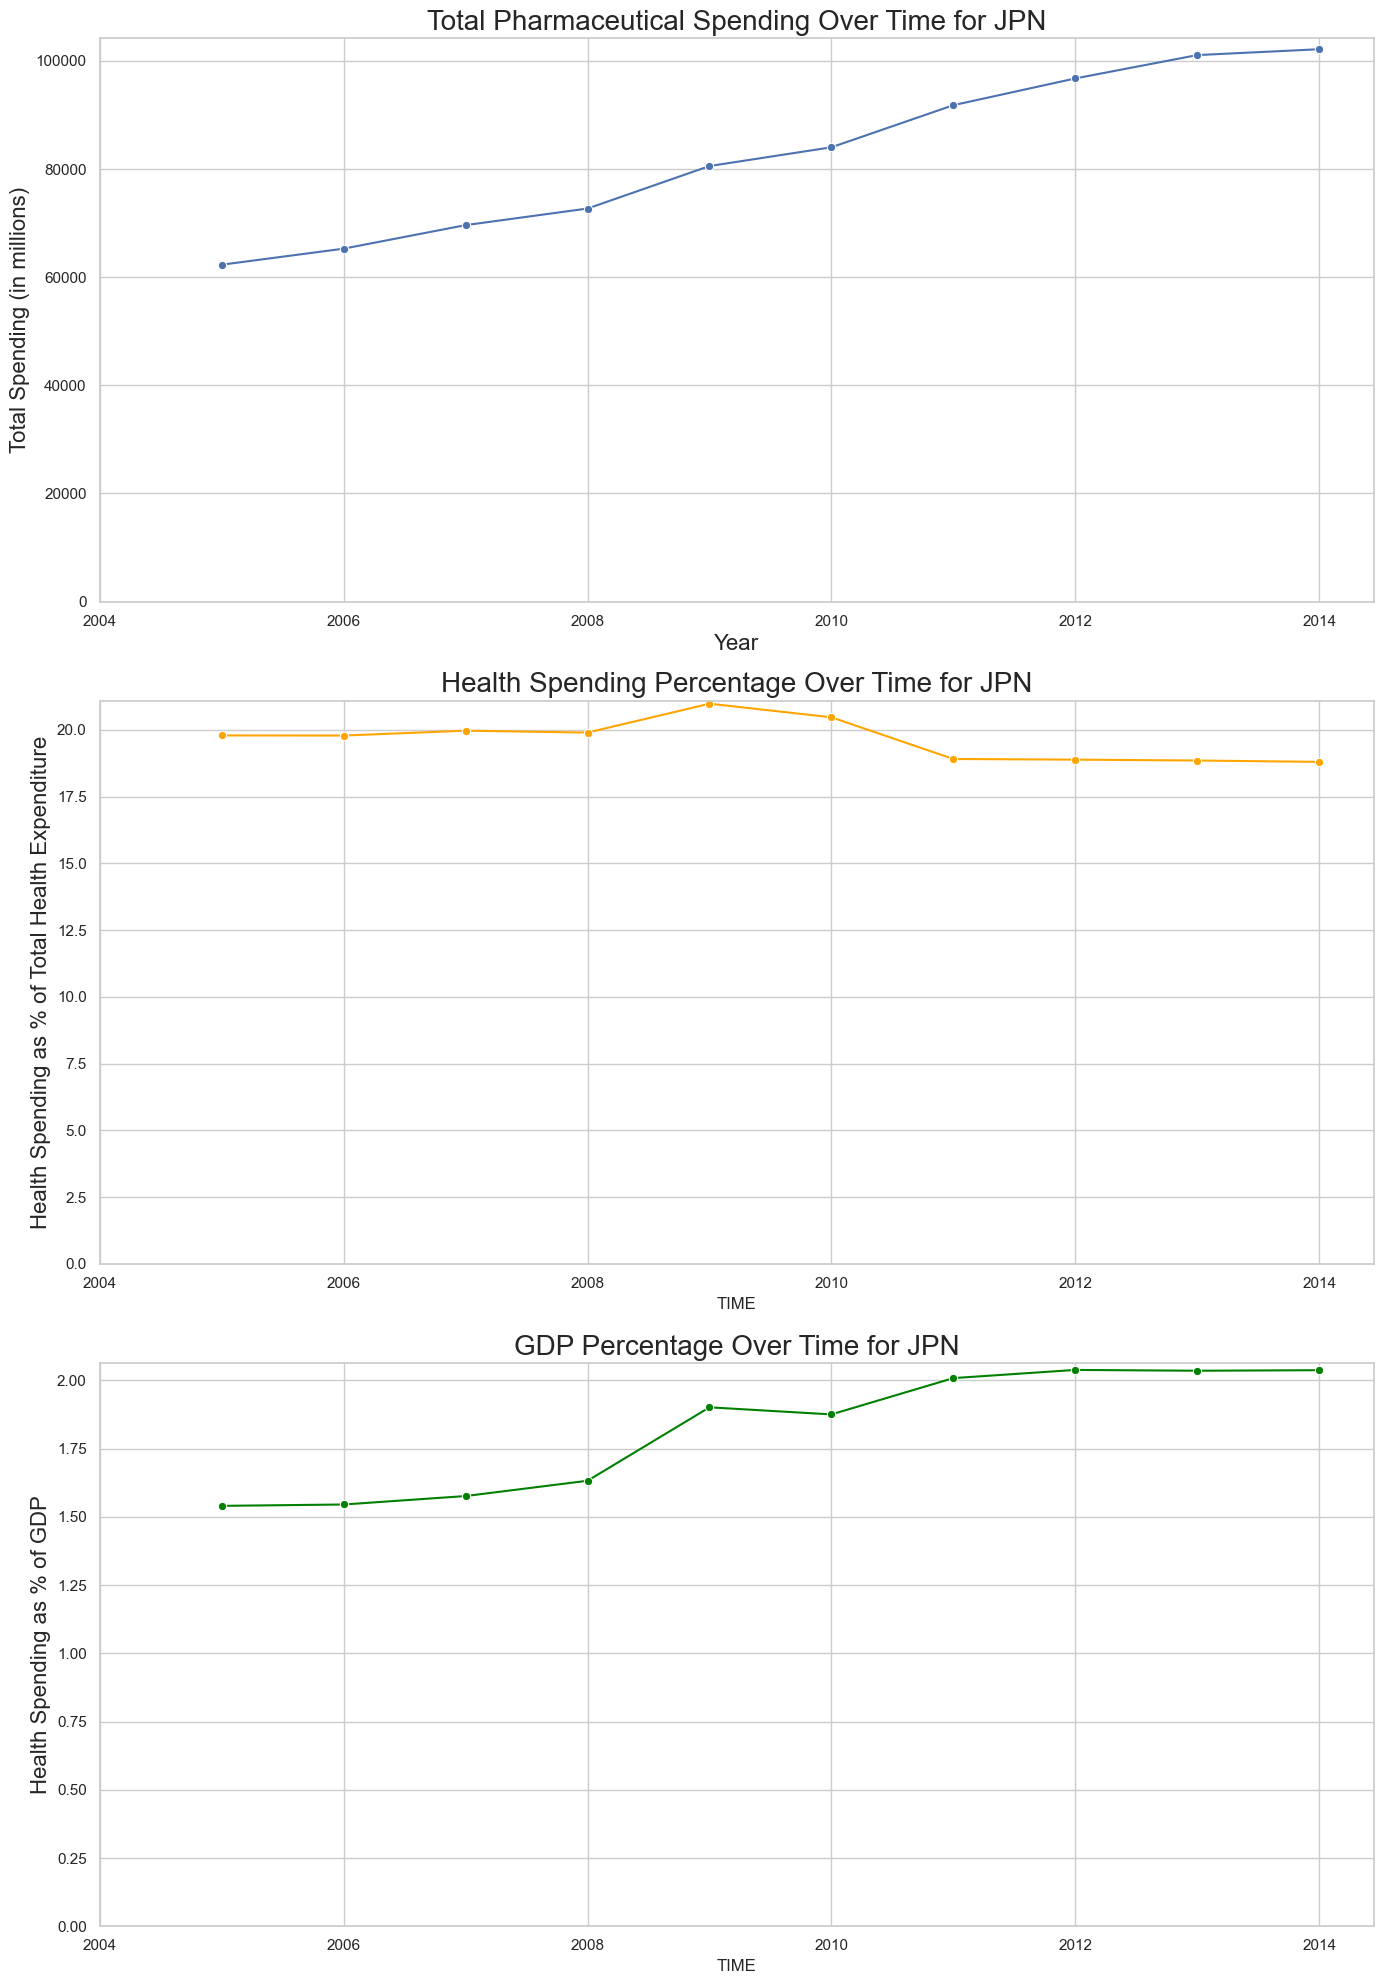

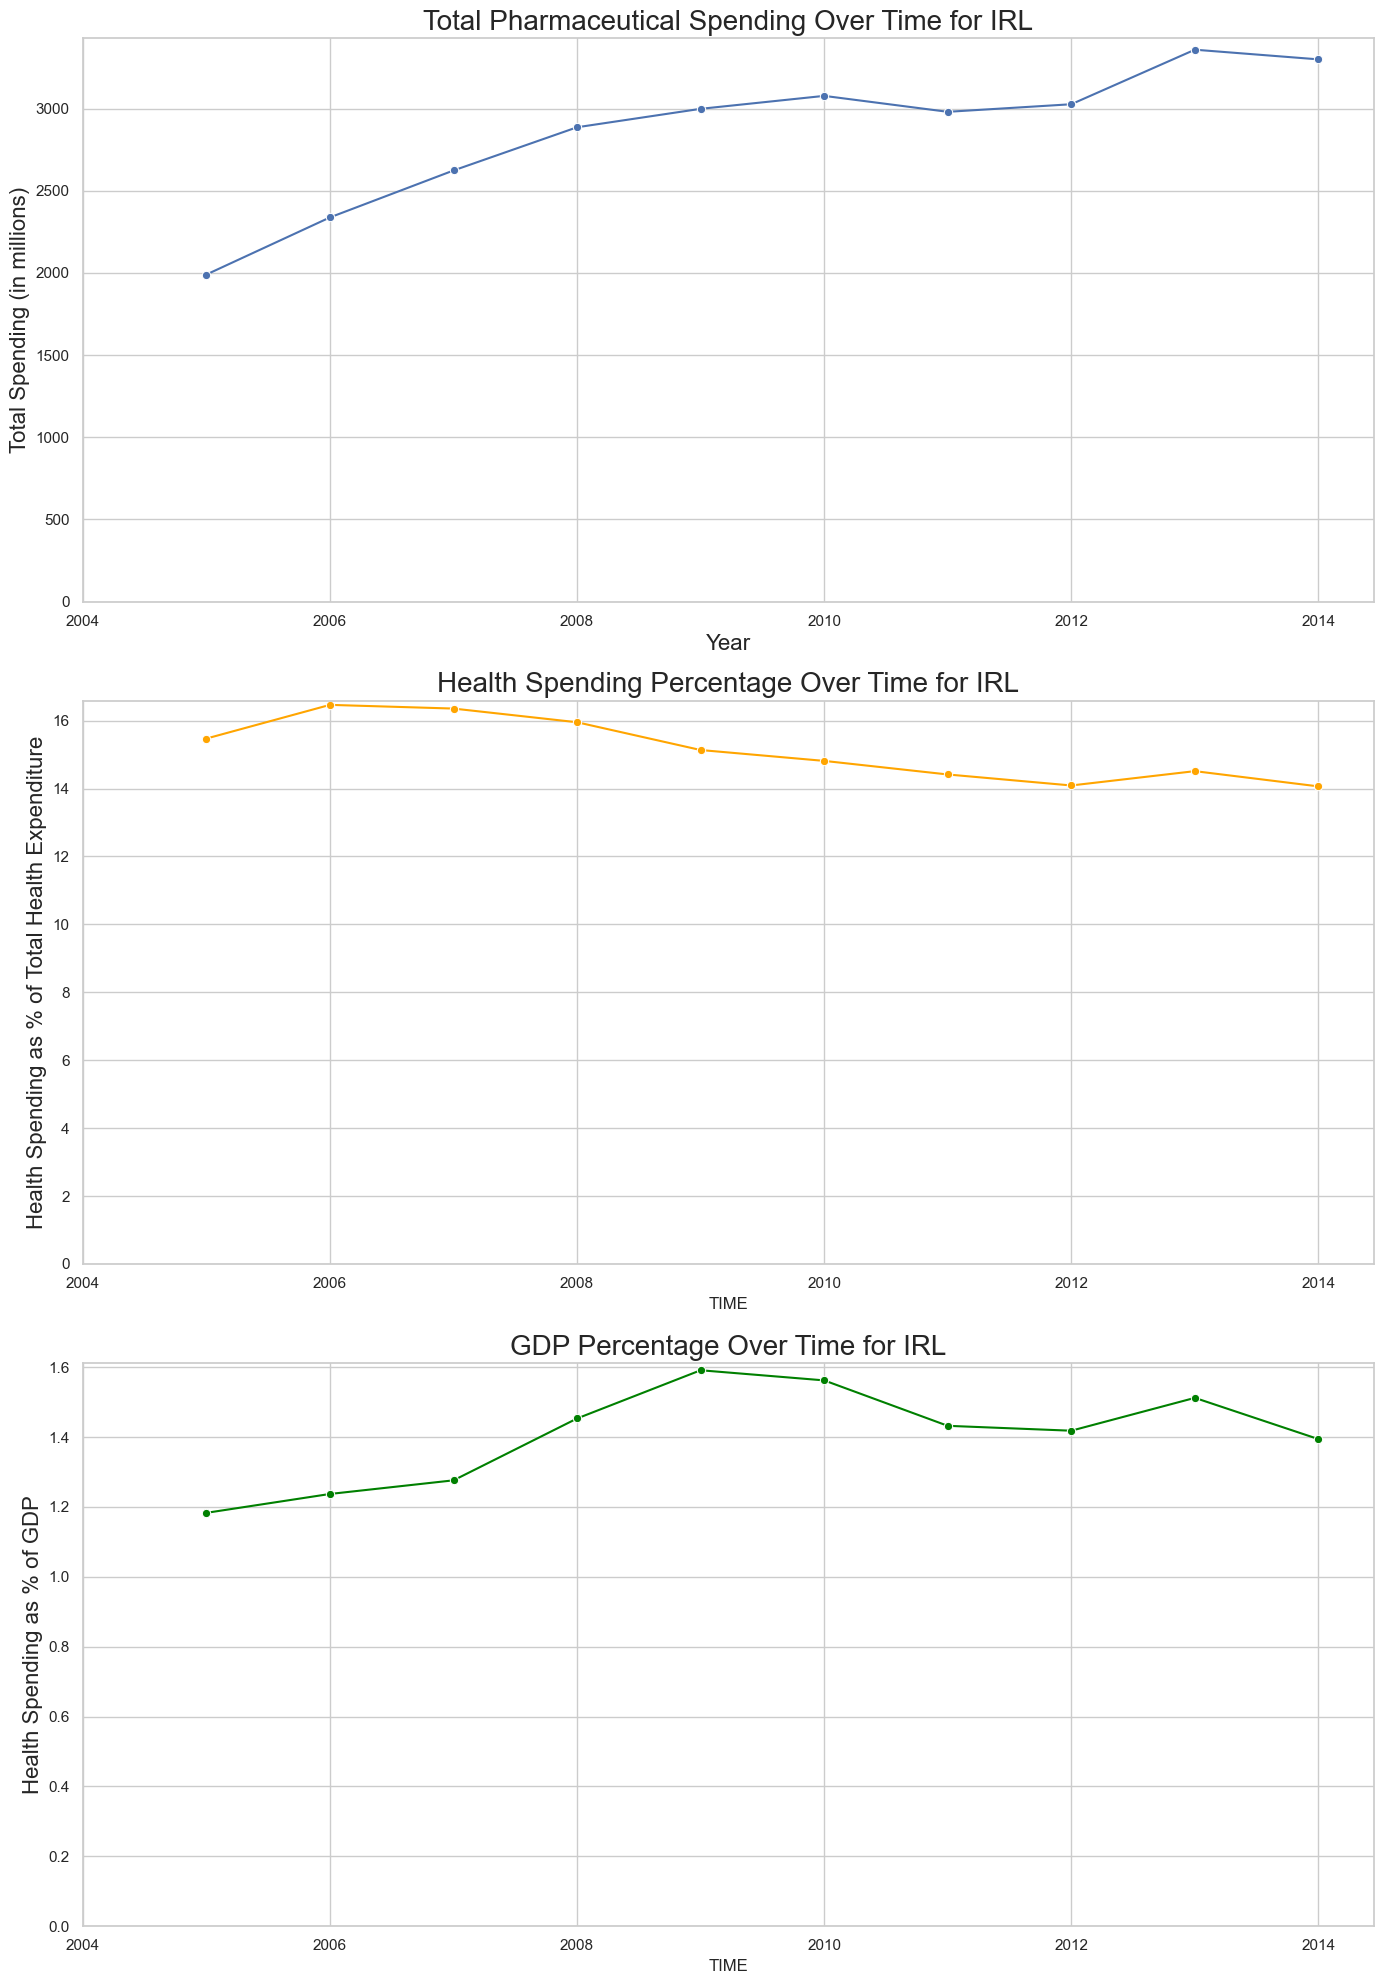

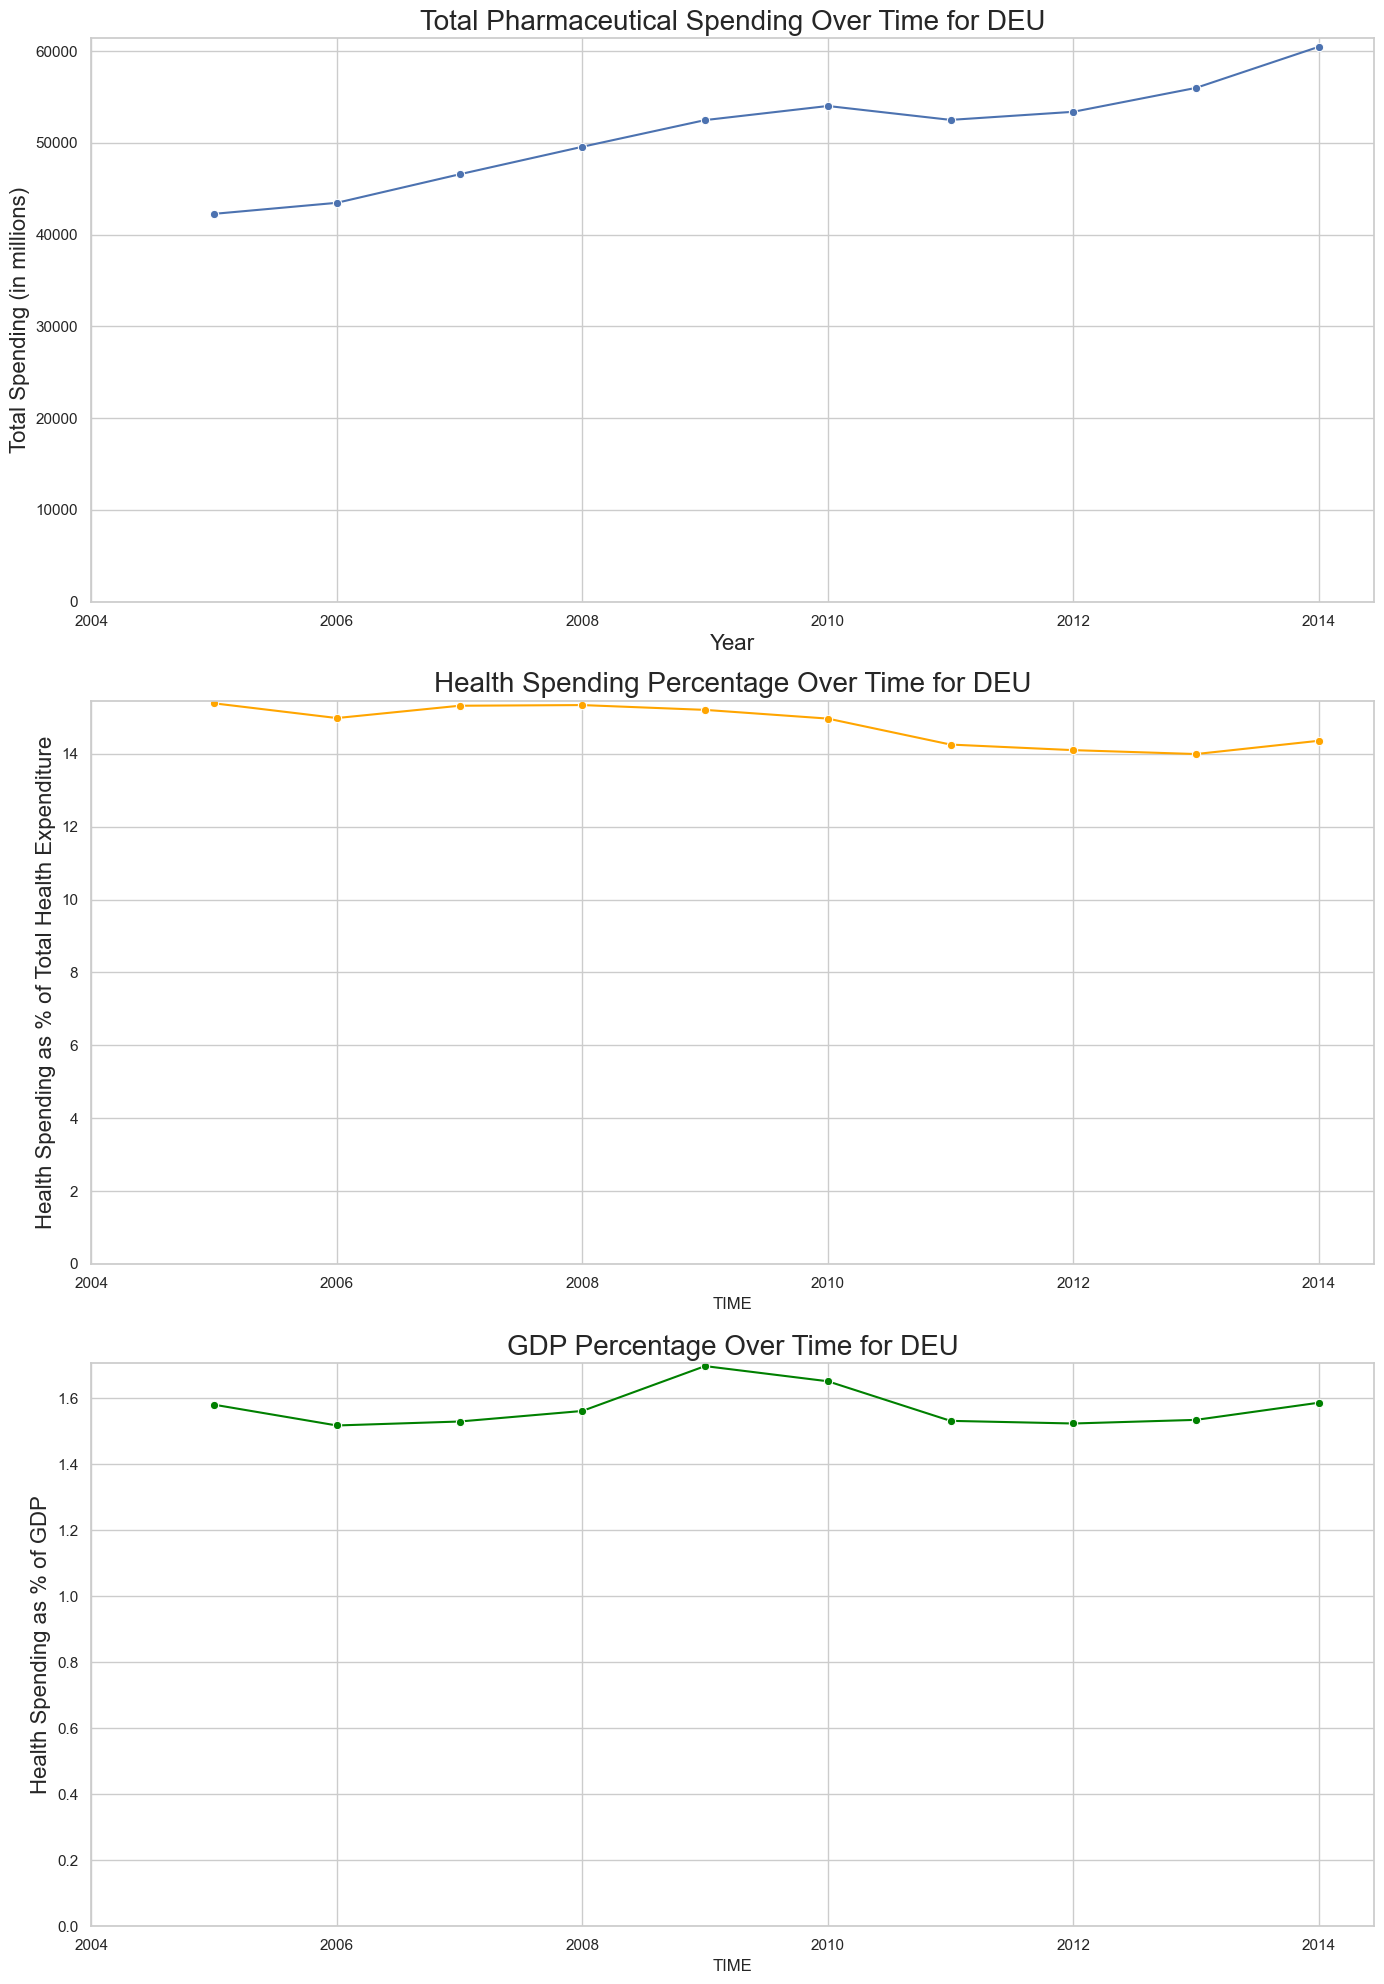

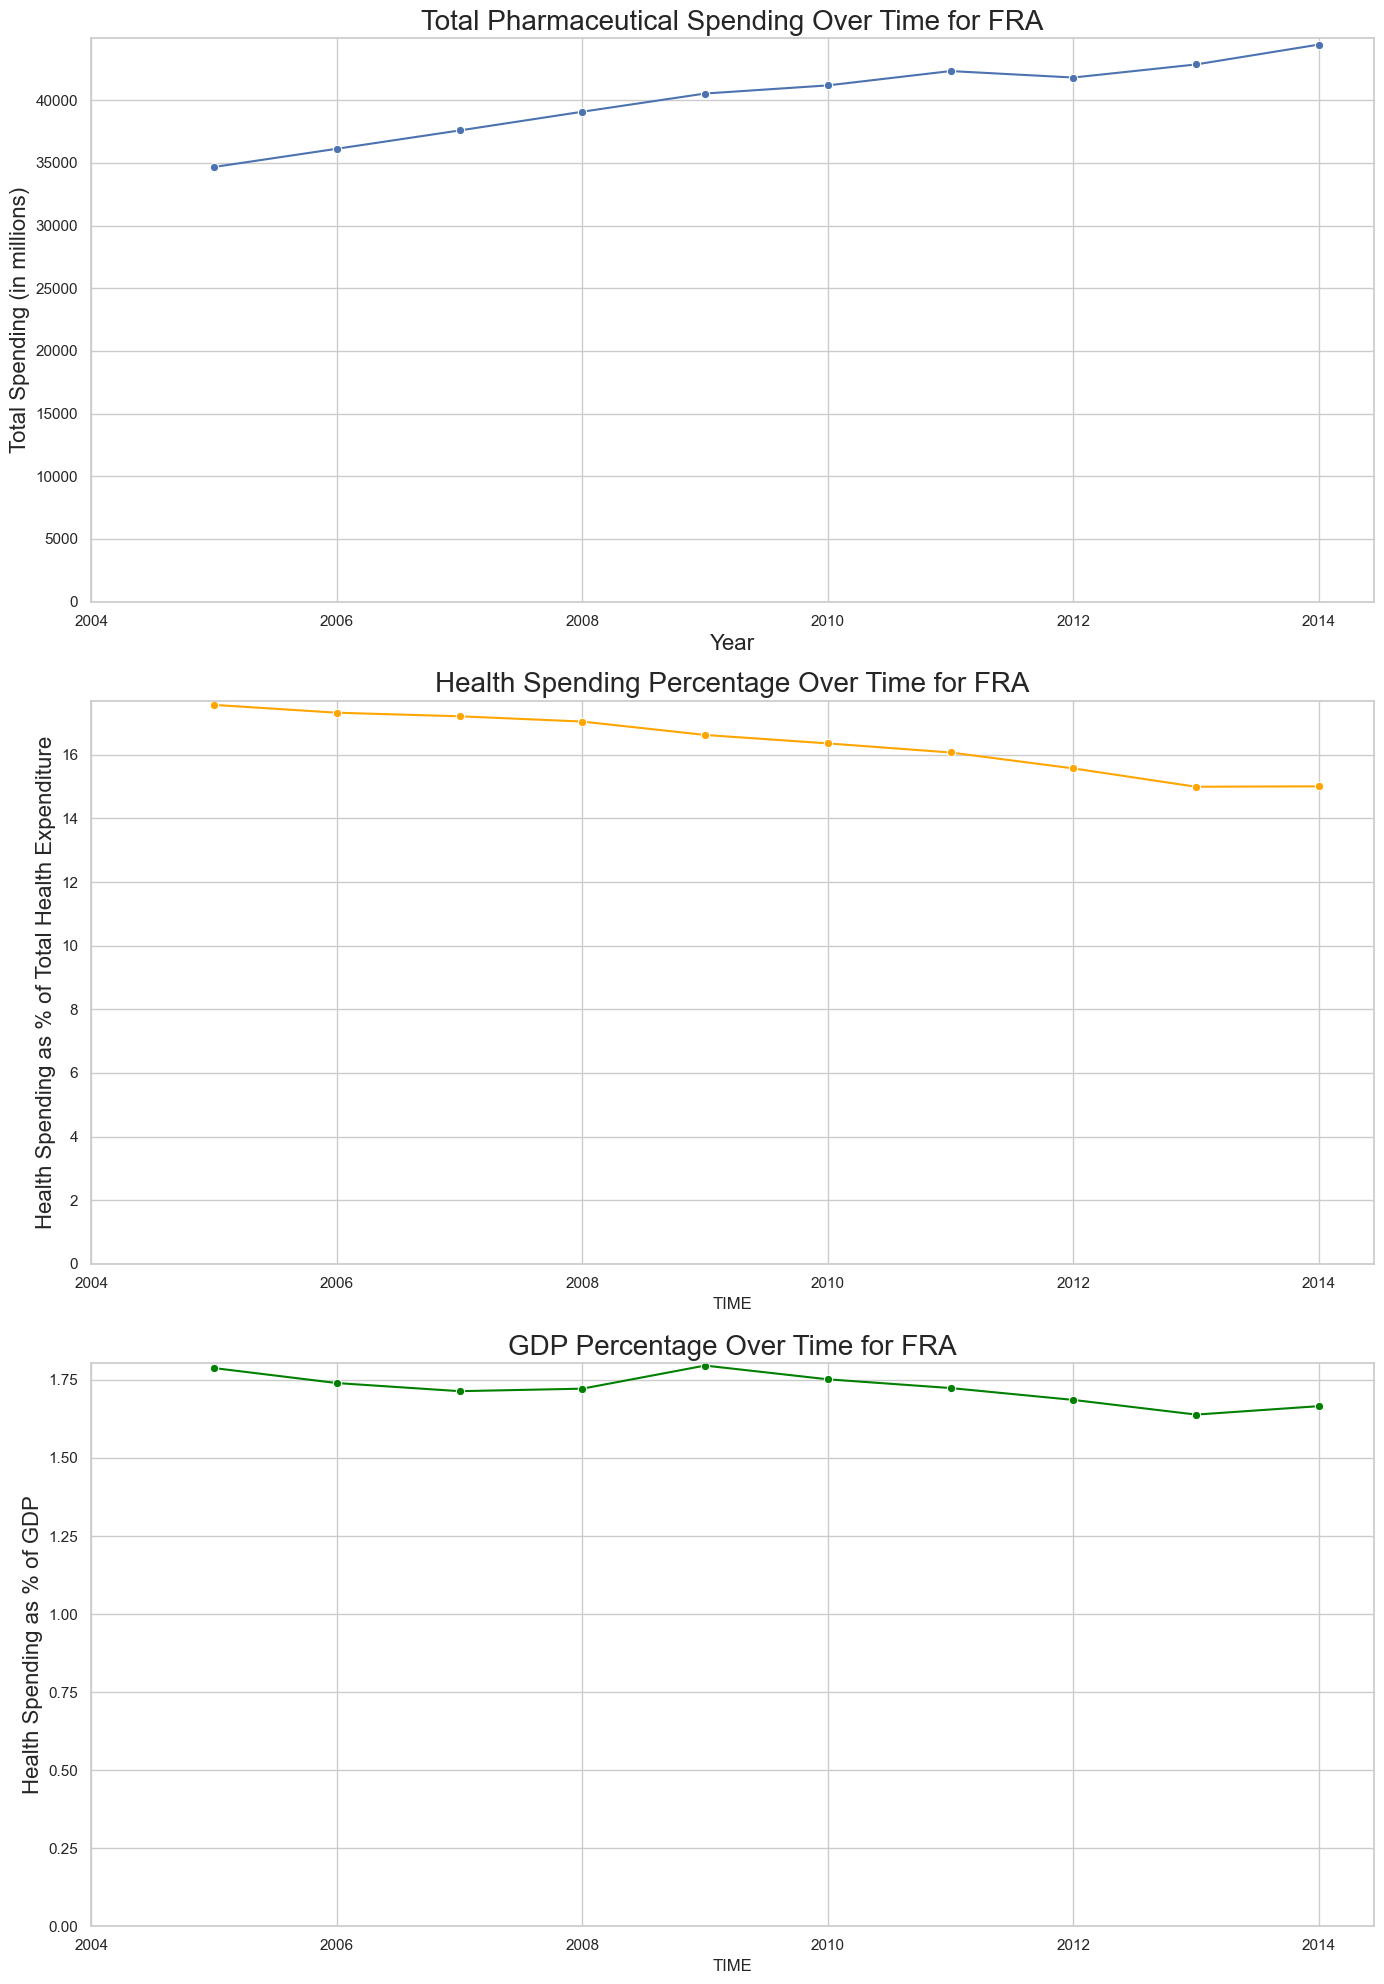

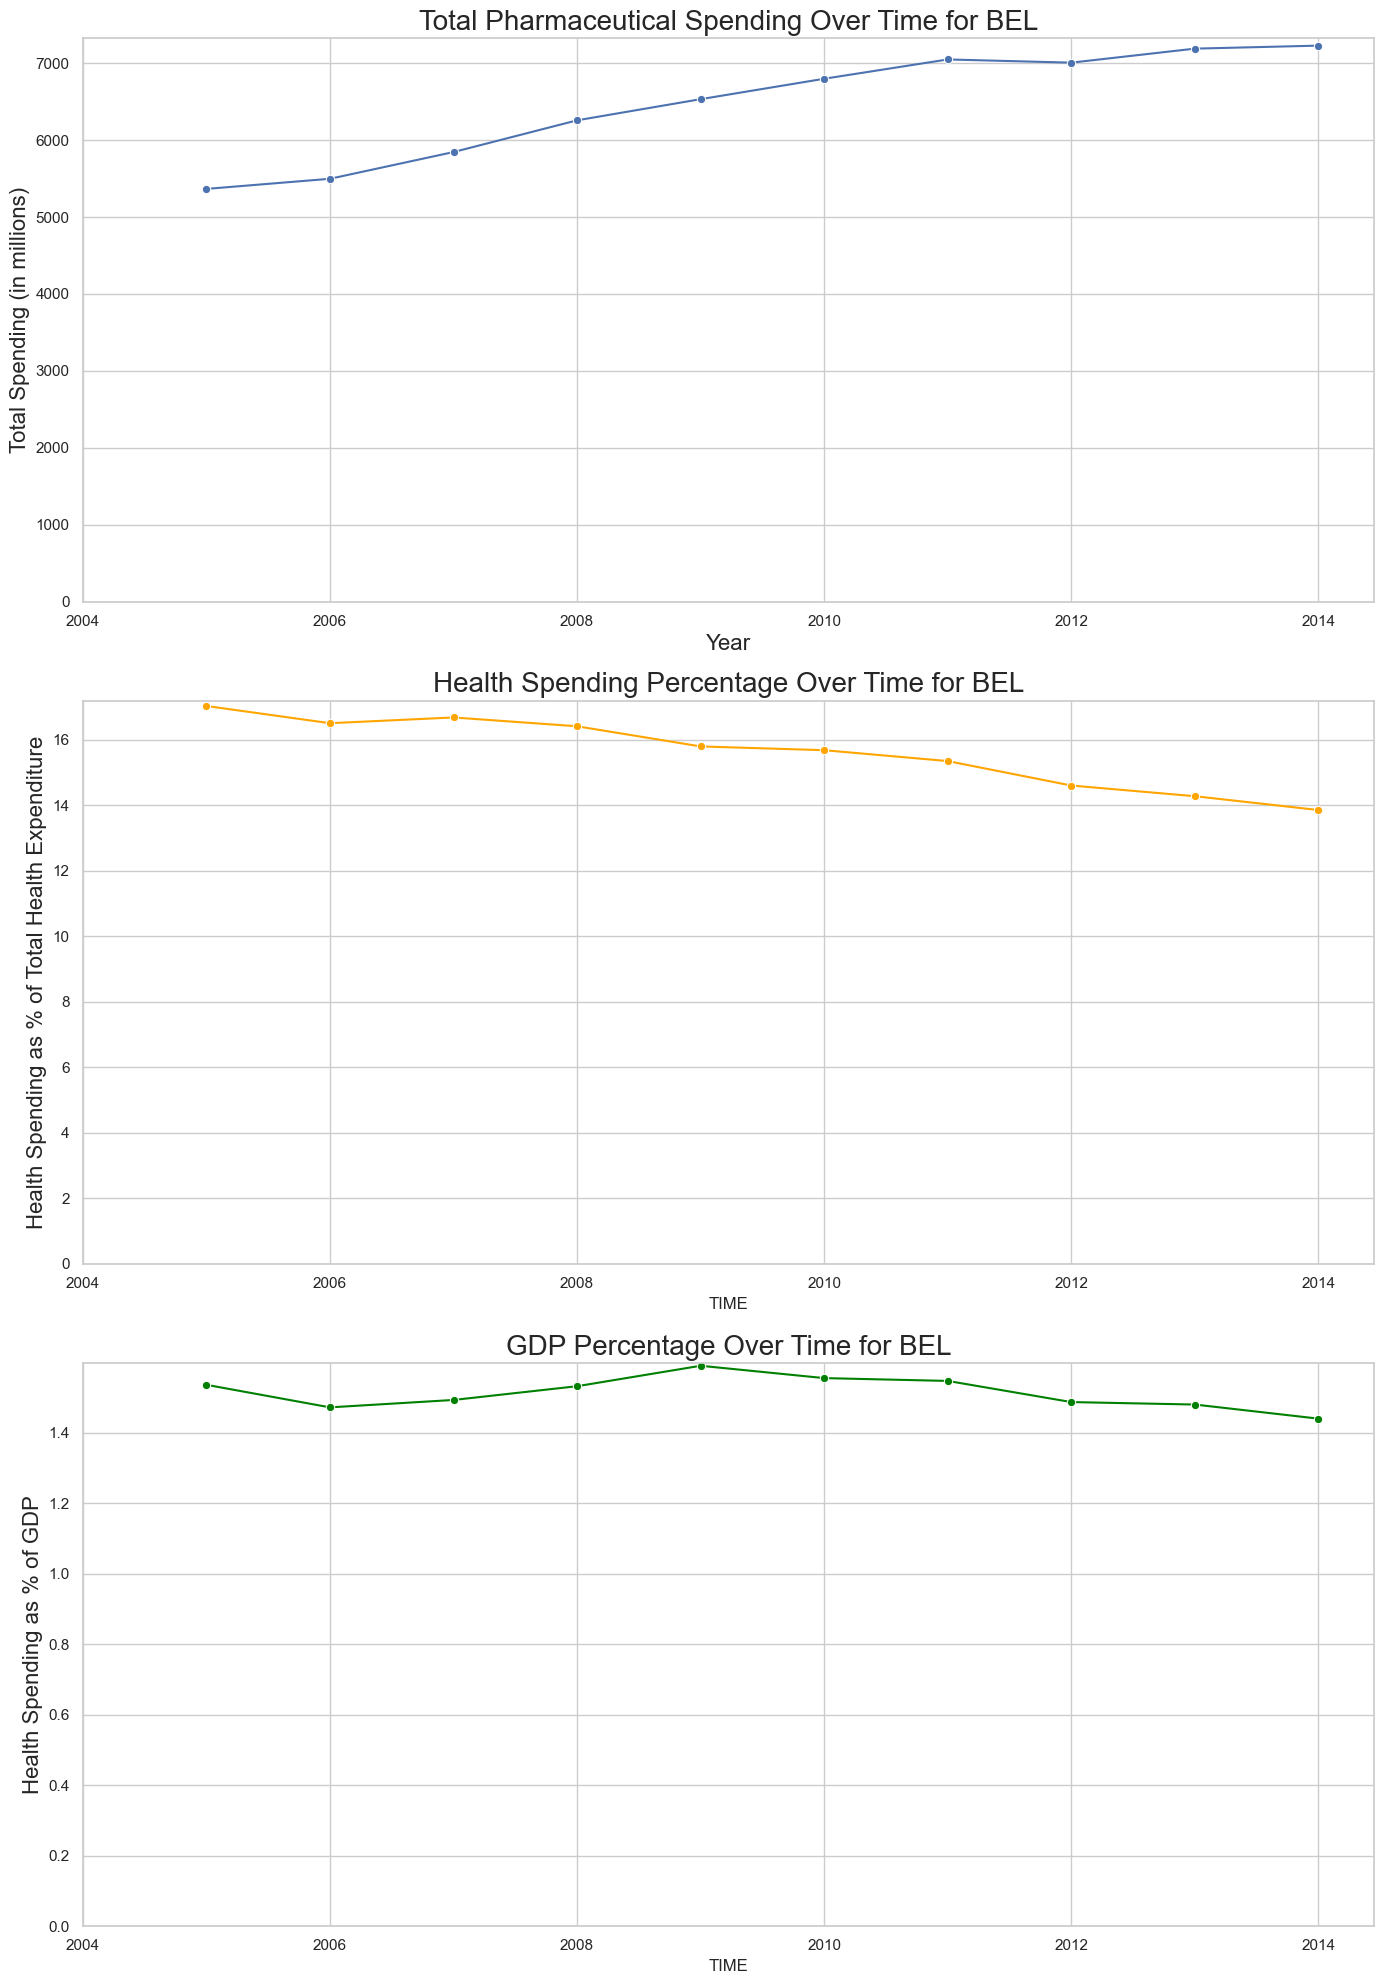

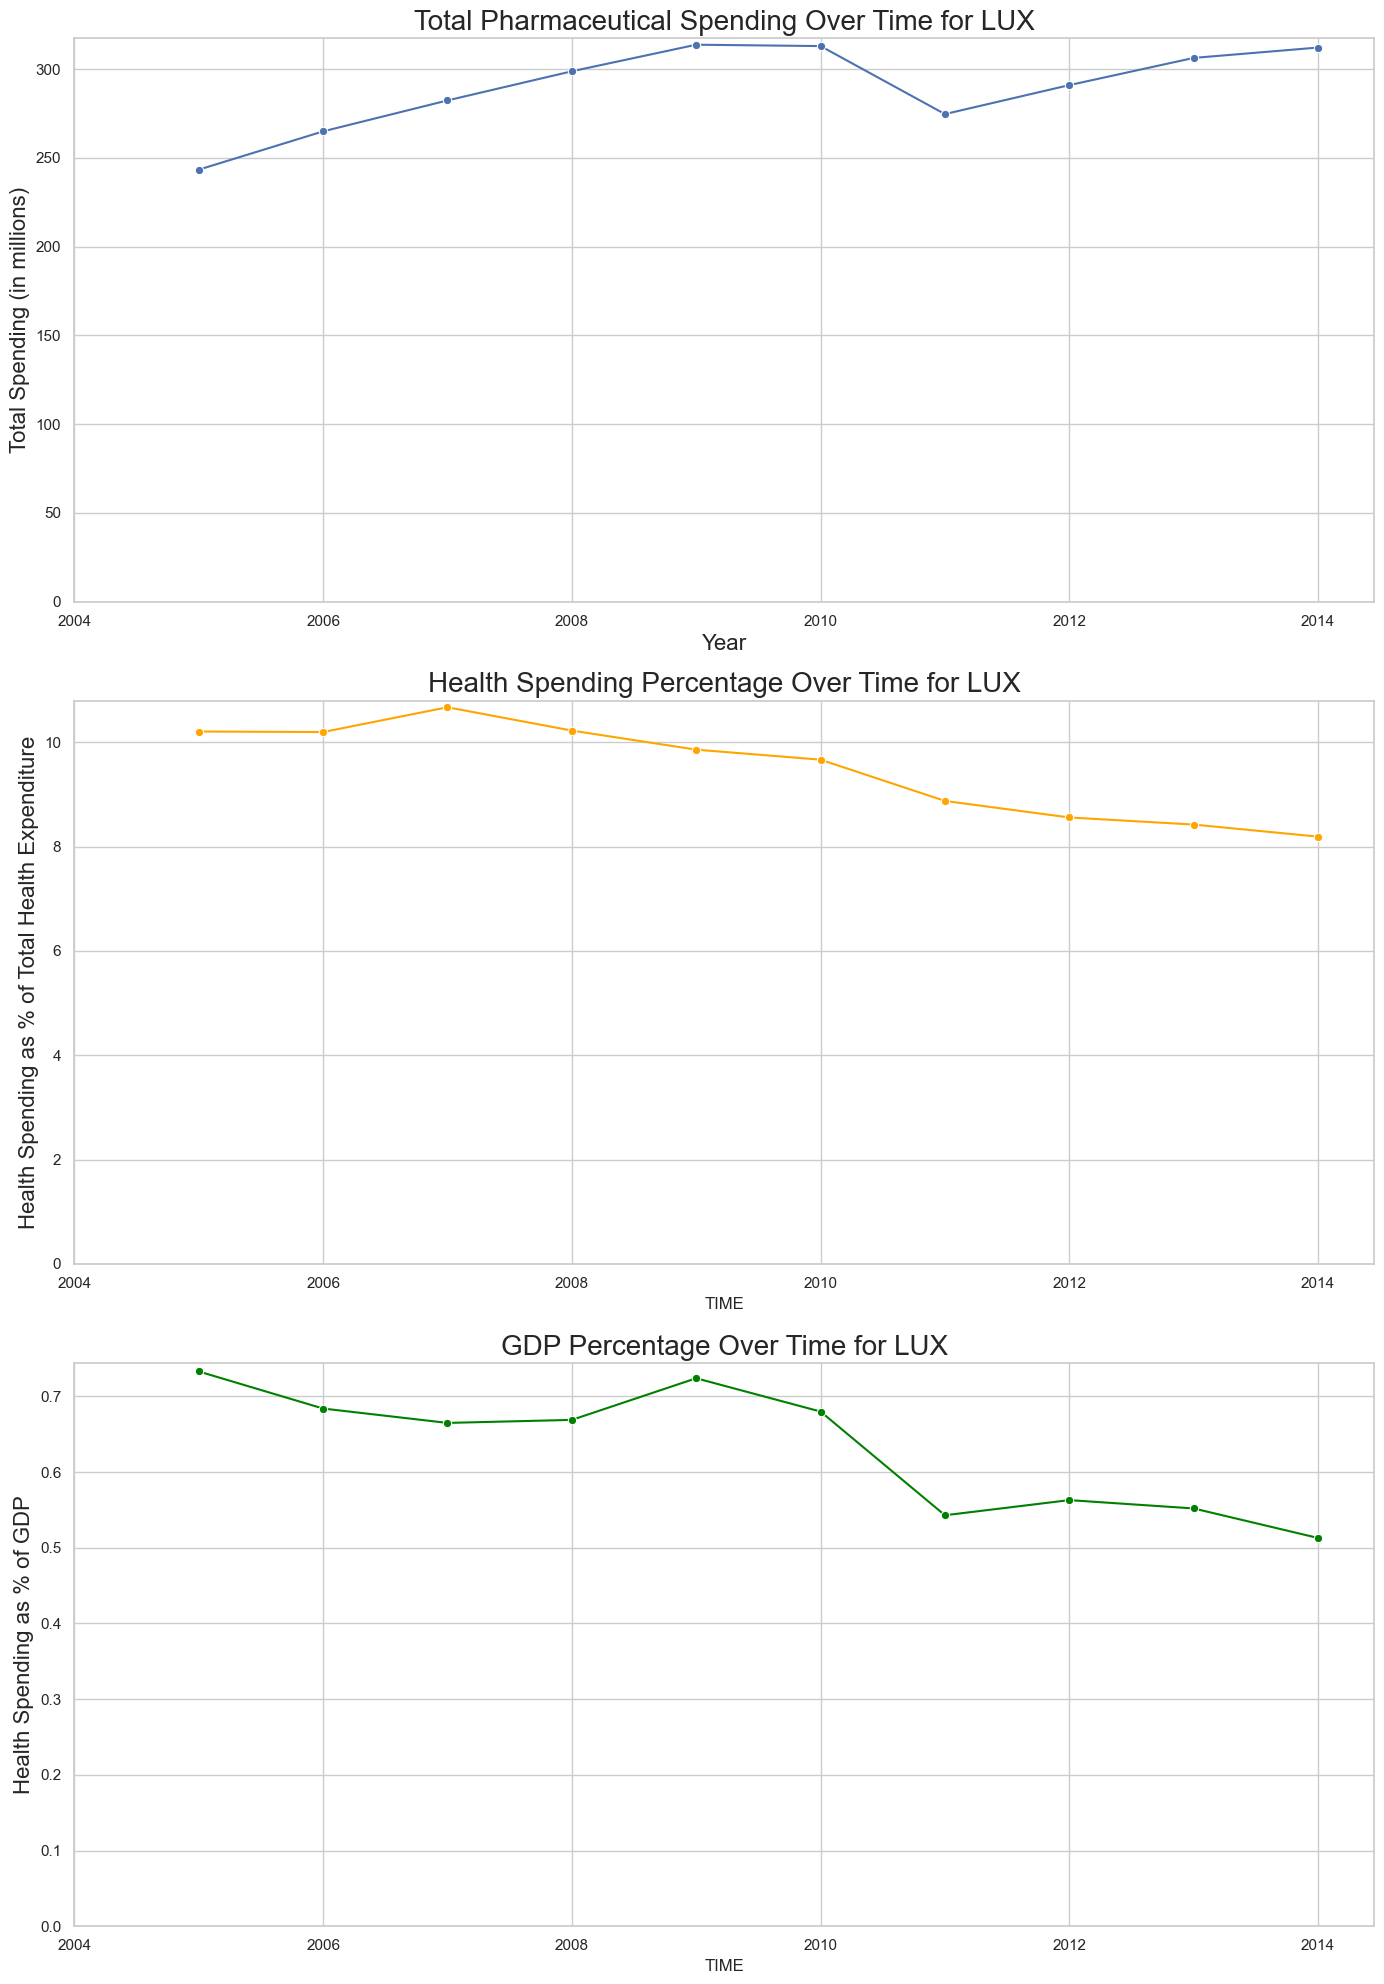

In [6]:
# Calculate the average USD_CAP per country
top_countries = (
    df_filtered.groupby('LOCATION')['USD_CAP'].mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter the DataFrame to include only the top 10 countries by USD_CAP
df_top_countries = df_filtered[df_filtered['LOCATION'].isin(top_countries)]

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Define the x-axis limits
x_axis_start = 2004
y_axis_start = 0

# Loop through only the top 10 countries
for country in top_countries:
    country_data = df_top_countries[df_top_countries['LOCATION'] == country]
    
    plt.figure(figsize=(14, 20))
    
    # Plot Total Spending
    plt.subplot(3, 1, 1)
    sns.lineplot(data=country_data, x='TIME', y='TOTAL_SPEND', marker='o')
    plt.title(f'Total Pharmaceutical Spending Over Time for {country}', fontsize = 20)
    plt.xlabel('Year', fontsize = 16)
    plt.ylabel('Total Spending (in millions)', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    # Plot Health Expenditure Percentage
    plt.subplot(3, 1, 2)
    sns.lineplot(data=country_data, x='TIME', y='PC_HEALTHXP', marker='o', color='orange')
    plt.title(f'Health Spending Percentage Over Time for {country}', fontsize = 20)
    plt.ylabel('Health Spending as % of Total Health Expenditure', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    # Plot GDP Percentage
    plt.subplot(3, 1, 3)
    sns.lineplot(data=country_data, x='TIME', y='PC_GDP', marker='o', color='green')
    plt.title(f'GDP Percentage Over Time for {country}', fontsize = 20)
    plt.ylabel('Health Spending as % of GDP', fontsize = 16)
    plt.xlim(left=x_axis_start)  # Set x-axis starting point to 1970
    plt.ylim(bottom=y_axis_start) 
    
    plt.tight_layout()
    plt.show()
